<a href="https://colab.research.google.com/github/MrBokl/np2022/blob/main/LR5/LR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №5

###студента групи Анд-31

### Майданик  Андрій

### Варіант №7

# Завдання №1

На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101

# Завдання №2

Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.

i1 = 10, i2 = 40, i3 = 70

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-04 20:22:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   210MB/s    in 8.8s    

2022-06-04 20:22:53 (176 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [2]:
#Coose the type of food according to the variant
import pathlib
import numpy as np
arr_index = [10, 40, 70]
data_dir_train = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir_train.glob('*')])) # created a list of class_names from the subdirectories
my_class_names = [class_names[arr_index[0]], class_names[arr_index[1]],class_names[arr_index[2]]]
print('Our classes:', my_class_names)

Our classes: ['bruschetta', 'french_fries', 'pad_thai']


In [3]:
from pathlib import Path
import shutil
import os
data_dir_test = pathlib.Path("101_food_classes_10_percent/test/")

#Delet all classese xcept specified
for name in class_names:
  if name != my_class_names[0] and name != my_class_names[1] and name != my_class_names[2]:
    dirpath_train = Path(data_dir_train) / name
    dirpath_test = Path(data_dir_test) / name
    if dirpath_test.exists() and dirpath_test.is_dir():
        shutil.rmtree(dirpath_train)
        shutil.rmtree(dirpath_test)
print('Test:', os.listdir(data_dir_test))
print('Train:', os.listdir(data_dir_train))

Test: ['bruschetta', 'pad_thai', 'french_fries']
Train: ['bruschetta', 'pad_thai', 'french_fries']


In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


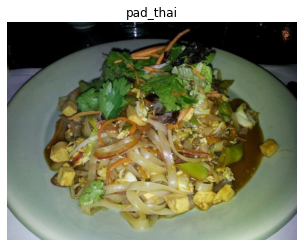

In [5]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="pad_thai")

Image shape: (512, 512, 3)


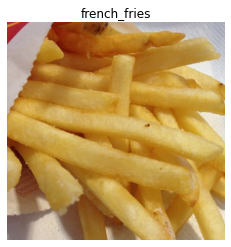

In [6]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="french_fries")

Image shape: (512, 512, 3)


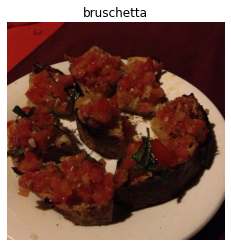

In [7]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="bruschetta")

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalize data 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories(our folders are confused)
train_dir = "101_food_classes_10_percent/test/"
test_dir = "101_food_classes_10_percent/train/"

In [9]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [10]:
# Create a CNN model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'), 
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
24/24 [==============================] - 26s 1s/step - loss: 1.0788 - accuracy: 0.3760 - val_loss: 1.0346 - val_accuracy: 0.5289
Epoch 2/20
24/24 [==============================] - 31s 1s/step - loss: 0.9344 - accuracy: 0.5800 - val_loss: 1.1734 - val_accuracy: 0.4489
Epoch 3/20
24/24 [==============================] - 26s 1s/step - loss: 0.8738 - accuracy: 0.5707 - val_loss: 0.8617 - val_accuracy: 0.6178
Epoch 4/20
24/24 [==============================] - 20s 844ms/step - loss: 0.7395 - accuracy: 0.7067 - val_loss: 0.8276 - val_accuracy: 0.6222
Epoch 5/20
24/24 [==============================] - 21s 861ms/step - loss: 0.6849 - accuracy: 0.7107 - val_loss: 0.7657 - val_accuracy: 0.6578
Epoch 6/20
24/24 [==============================] - 20s 849ms/step - loss: 0.6374 - accuracy: 0.7427 - val_loss: 0.8262 - val_accuracy: 0.5911
Epoch 7/20
24/24 [==============================] - 20s 845ms/step - loss: 0.5991 - accuracy: 0.7587 - val_loss: 0.7241 - val_accuracy: 0.6889
Epoch 8/

In [11]:
# Plots
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

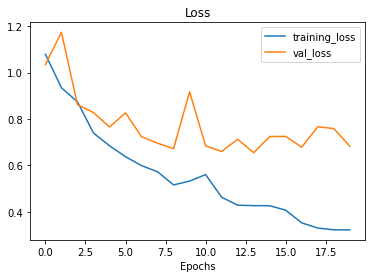

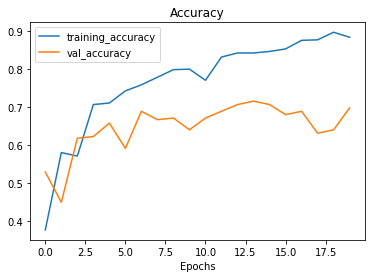

In [12]:
plot_loss_curves(history_1)

In [13]:
# Predicate values
pred = model_1.predict(valid_data).argmax(axis=1)
len(pred)

225

In [14]:
# Our true values
true_y = []
for batch in range(len(valid_data)):
    true_y += list(valid_data[batch][-1].argmax(axis=1))
len(true_y)

225

In [15]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
conf_matrix = pd.DataFrame(confusion_matrix(y_pred=pred, y_true=true_y), 
                            index=my_class_names, 
                            columns=my_class_names)
conf_matrix

,bruschetta,french_fries,pad_thai
bruschetta,27,26,22
french_fries,26,19,30
pad_thai,22,29,24


In [16]:
# Check our values
def load_and_prep_image(target_dir, target_class, img_shape=224):
  # Read in target file (an image)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  img = tf.convert_to_tensor(img)
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  # img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img
def pred_and_plot(model, target_dir, target_class, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(target_dir, target_class)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

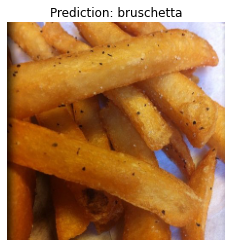

In [17]:
pred_and_plot(model_1, '101_food_classes_10_percent/train/', 'french_fries', my_class_names)

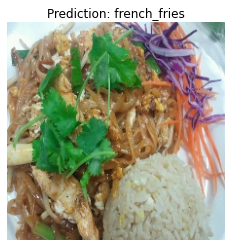

In [18]:
pred_and_plot(model_1, '101_food_classes_10_percent/train/', 'pad_thai', my_class_names)

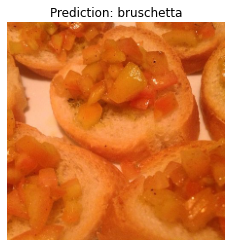

In [19]:
pred_and_plot(model_1, '101_food_classes_10_percent/train/', 'bruschetta', my_class_names)

# Висновок

В ході лабораторної роботи ми розглянули згорткові нейронні мережі. Їх дуже гарно використовувати для аналізу візуальних зображень, тому що ми берем ценр зображення і згортаємо його в один блок і таким чином наше зображення зменшується у вигляді. Таким чином ми навчилися розпізнавати тип їжі на фото.